In [78]:
import numpy as np
import pandas as pd
loandata = pd.read_csv ('D:\IIIT\ClubCasestudy\loan.csv',header=0,encoding = 'palmos')
loandata.head()




C:\Users\snehap\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [79]:
#*************************DATA CLEANING******************************
#*****************Missing values in columns & Rows*******************
#STEP1 --Observe any columns having more than 50%

# Summing up the missing values columnwise (percentage of the missing values)
round(100*(loandata.isnull().sum()/len(loandata.index)),2)
#most of the columns have the more than 50% missing values ,these columns won't be useful in analysis
#setting threshold to remove the columns whose data is missing more than 50%
thresh = len(loandata) *0.5
#print (len(loanddata))
loandata.dropna(thresh = thresh, axis = 1, inplace = True)

#STEP2 --Observe any column having more than 20% missing values
round(100*(loandata.isnull().sum()/len(loandata.index)),2)
#desc 32% missing and this field having why the borrower required loan. This may not be the parameter , this we can remove safely
loandata = loandata.drop('desc',axis=1)
#loandata.info()
round(100*(loandata.isnull().sum()/len(loandata.index)),2)


id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [80]:
#STEP 3 
#Emp_title(6%),Pub_rec_bankruptcies(2%),Emp_length(2.7%) having missing values
#removing the rows of Jobtitle & Employee experience where data missing 
loandata = loandata[~pd.isnull(loandata['emp_title'])]
loandata = loandata[~pd.isnull(loandata['emp_length'])]
loandata = loandata[~pd.isnull(loandata['pub_rec_bankruptcies'])]
round(100*(loandata.isnull().sum()/len(loandata.index)),2)
#last_pymnt_d(0.18),revol_util (0.13)  

loandata = loandata[~pd.isnull(loandata['last_pymnt_d'])]
loandata = loandata[~pd.isnull(loandata['revol_util'])]

round(100*(loandata.isnull().sum()/len(loandata.index)),2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     0.00
emp_length                    0.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.02
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [83]:
#*************************DATA Convertion******************************
#***************Identifying the DATATYPE miss matches *******************
#STEP 1 - String to Numeric Conversion
#loandata.info()
#int_rate should be Float value and need to remove the % from the data
loandata['int_rate'] = loandata['int_rate'].replace('%','', regex=True)
loandata['int_rate'] = pd.to_numeric(loandata['int_rate']) 
loandata.info()
loandata.head()

#EmpLength 
#Extract Numeric value from the string (remove Years from the string)
import re
loandata['emp_length'] = loandata['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
loandata.head()
# convert to numeric
loandata['emp_length'] = pd.to_numeric(loandata['emp_length']) 
#Remove months from the term
loandata['term'] = loandata['term'].apply(lambda x: re.findall('\d+', str(x))[0])
loandata.head()
# convert to numeric
loandata['term'] = pd.to_numeric(loandata['term']) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36442 entries, 1 to 39680
Data columns (total 53 columns):
id                            36442 non-null int64
member_id                     36442 non-null int64
loan_amnt                     36442 non-null int64
funded_amnt                   36442 non-null int64
funded_amnt_inv               36442 non-null float64
term                          36442 non-null int64
int_rate                      36442 non-null float64
installment                   36442 non-null float64
grade                         36442 non-null object
sub_grade                     36442 non-null object
emp_title                     36442 non-null object
emp_length                    36442 non-null int64
home_ownership                36442 non-null object
annual_inc                    36442 non-null float64
verification_status           36442 non-null object
issue_d                       36442 non-null object
loan_status                   36442 non-null object
pymnt_pla

In [84]:
#STEP 2 - String to Date conversion
#issue_d,earliest_cr_line
from datetime import datetime
loandata['issue_d'] = loandata['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
#loandata['earliest_cr_line'] = loandata['earliest_cr_line'].apply(lambda x: datetime.strptime(x, '%b-%y'))
#loandata['last_pymnt_d'] = loandata['last_pymnt_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
#loandata['last_credit_pull_d'] = loandata['last_credit_pull_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))


loandata['month'] = loandata['issue_d'].apply(lambda x: x.month)
loandata['year'] = loandata['issue_d'].apply(lambda x: x.year)

loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36442 entries, 1 to 39680
Data columns (total 55 columns):
id                            36442 non-null int64
member_id                     36442 non-null int64
loan_amnt                     36442 non-null int64
funded_amnt                   36442 non-null int64
funded_amnt_inv               36442 non-null float64
term                          36442 non-null int64
int_rate                      36442 non-null float64
installment                   36442 non-null float64
grade                         36442 non-null object
sub_grade                     36442 non-null object
emp_title                     36442 non-null object
emp_length                    36442 non-null int64
home_ownership                36442 non-null object
annual_inc                    36442 non-null float64
verification_status           36442 non-null object
issue_d                       36442 non-null datetime64[ns]
loan_status                   36442 non-null object
p

In [85]:
#STEP 3 round the amount fields 
#total_pymnt,total_rec_late_fee,funded_amnt_inv into 2 decimal places
print(loandata['total_pymnt'].tail())

loandata['total_pymnt']= round(loandata['total_pymnt'],2)
loandata['total_rec_late_fee']= round(loandata['total_rec_late_fee'],2)
loandata['funded_amnt_inv']= round(loandata['funded_amnt_inv'],2)

loandata.tail(10)


39551    14370.922250
39562     5134.085288
39623     4015.960000
39666    11652.750000
39680     3579.662273
Name: total_pymnt, dtype: float64


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,month,year
39362,218343,218321,2150,2150,1575.00,36,10.78,70.17,C,C1,...,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0,1,2008
39425,202270,202156,4000,4000,1199.99,36,12.36,133.55,D,D1,...,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0,1,2008
39430,200912,200892,9400,9400,1748.29,36,13.30,318.09,D,D4,...,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0,1,2008
39433,200600,200597,7500,7500,1599.78,36,9.83,241.41,B,B3,...,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0,1,2008
39475,186572,186568,12000,12000,725.00,36,9.01,381.66,B,B2,...,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0,12,2007
39551,158706,158450,12375,12375,1000.00,36,10.91,404.62,C,C3,...,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0,12,2007
39562,154154,151536,4800,4800,1100.00,36,10.28,155.52,C,C1,...,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0,11,2007
39623,132892,132889,9000,9000,700.00,36,12.49,301.04,D,D3,...,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0,10,2007
39666,119043,119040,15450,15450,600.00,36,11.22,507.46,C,C4,...,NaN,1,INDIVIDUAL,0,NaN,0,1.0,0.0,8,2007
39680,112496,112493,3000,3000,525.00,36,11.86,99.44,D,D1,...,NaN,1,INDIVIDUAL,0,NaN,0,1.0,0.0,8,2007


In [86]:
#STEP 4
#Observe the columns which will not be useful in analysis and drop the columns
#loandata.info()

loandata = loandata.drop(['title', 'url', 'zip_code', 'addr_state','id','member_id'], axis=1)
loandata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36442 entries, 1 to 39680
Data columns (total 49 columns):
loan_amnt                     36442 non-null int64
funded_amnt                   36442 non-null int64
funded_amnt_inv               36442 non-null float64
term                          36442 non-null int64
int_rate                      36442 non-null float64
installment                   36442 non-null float64
grade                         36442 non-null object
sub_grade                     36442 non-null object
emp_title                     36442 non-null object
emp_length                    36442 non-null int64
home_ownership                36442 non-null object
annual_inc                    36442 non-null float64
verification_status           36442 non-null object
issue_d                       36442 non-null datetime64[ns]
loan_status                   36442 non-null object
pymnt_plan                    36442 non-null object
purpose                       36442 non-null object

Fully Paid     84.0
Charged Off    14.0
Current         3.0
Name: loan_status, dtype: float64


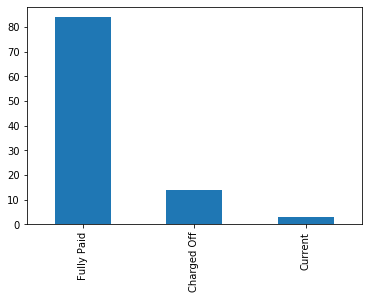

In [87]:
# Identifing 5 variables which are strong indicators of default.
#Univariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns
my_colors = 'rgbkymc'
plot1 = round((loandata['loan_status'].value_counts()/loandata['loan_status'].count())*100)
print(plot1)

#plot3.plot(kind='bar', stacked=True,color=my_colors)
plot1.plot(kind='bar', stacked=True)
#OBSERVATION
#84% Fully paid & #14% default cases


In [88]:
# Change to int 
loandata['loan_status'] = loandata['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else x)

loandata['loan_status'] = loandata['loan_status'].apply(lambda x: 1 if x=='Charged Off' else x)

loandata['loan_status'] = loandata['loan_status'].apply(lambda x: 2 if x=='Current' else x)

# converting loan_status to integer type
loandata['loan_status'] = loandata['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loandata['loan_status'].value_counts()

0    30432
1     4944
2     1066
Name: loan_status, dtype: int64

['C' 'B' 'A' 'E' 'D' 'F' 'G']
B    11037
A     9176
C     7432
D     4878
E     2651
F      970
G      298
Name: grade, dtype: int64


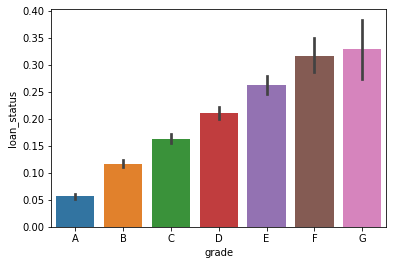

In [89]:
#Identifying Catgorical variables 
#1.Term
#2.grade
#3.Sub_grade
#4.Emp_length
#5.Home_OwnerShip
#6.Annual Income
#7.loan_amnt
#loandata.info()

print(loandata['grade'].unique())
print(loandata['grade'].value_counts())
#print(loandata['sub_grade'].unique())
#loandata['Emp_length'].unique()
#loandata['Title'].unique()
#loandata['Term'].unique()
#loandata['Home_OwnerShip'].unique()


#not considering the Current status loans
defaultcase = loandata.where(loandata.loan_status != 2)
#sns.barplot(x='grade', y='loan_status', data=loandata)

#plt.show()
defaultcase.sort_values('grade',inplace=True)
sns.barplot(x='grade', y='loan_status', data=defaultcase)
plt.show()
#OBSERVATION
#Clearly, as the grade of loan goes from A to G, the default rate increases. 
#grade decides Lending Club based on the riskiness of the loan.





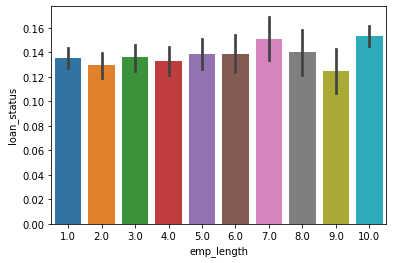

In [90]:
## Will consider the employee experience 
sns.barplot(x='emp_length', y='loan_status', data=defaultcase)
plt.show()
#OBSERVATION
###There very less differntiatir if you compare years of experience , So this variable is NOT a good univariate variable

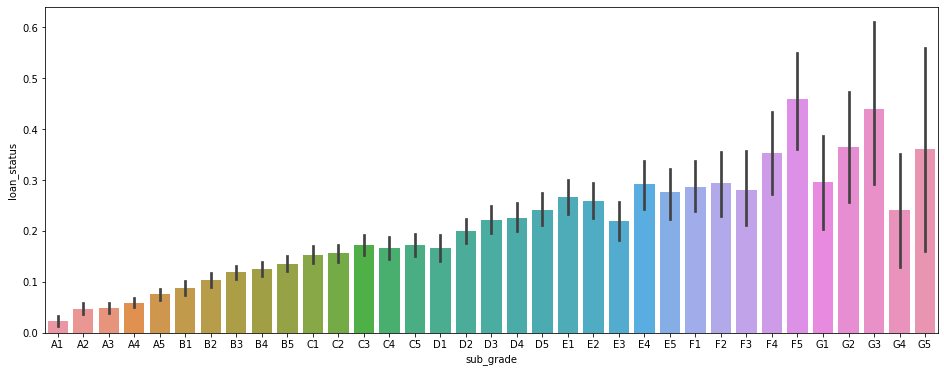

In [92]:
#loandata.info()
## Will consider the Sun_grade
#print(loandata['sub_grade'].value_counts())
plt.figure(figsize=(16, 6))
defaultcase.sort_values('sub_grade',inplace=True)
sns.barplot(x='sub_grade', y='loan_status', data=defaultcase)
#plt.xticks(rotation='vertical')
plt.show()
#OBSERVATION
###subgrade is clear differentiator it A1 to A5 F4 to F5 & G1 to G5

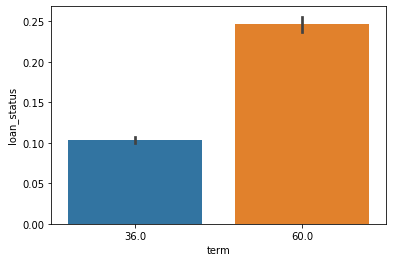

In [93]:
#loandata.info()
## Will consider the Term
defaultcase.sort_values('term',inplace=True)
sns.barplot(x='term', y='loan_status', data=defaultcase)
#plt.xticks(rotation='vertical')
plt.show()
#OBSERVATION
###Term is clear Differentiator for Default cases

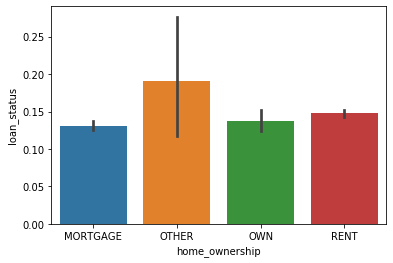

In [94]:
#loandata.info()
# Will consider the home_ownership
defaultcase.sort_values('home_ownership',inplace=True)
sns.barplot(x='home_ownership', y='loan_status', data=defaultcase)
#plt.xticks(rotation='vertical')
plt.show()
#OBSERVATION
###home_ownership is not a good differentiator all are at same level except Others

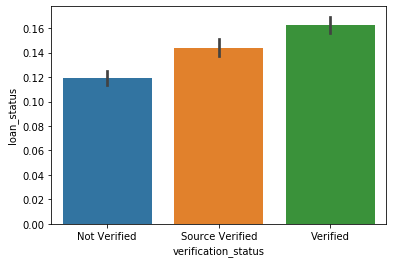

Fully Paid     84.0
Charged Off    14.0
Current         3.0
Name: loan_status, dtype: float64
Not Verified       41.0
Verified           33.0
Source Verified    26.0
Name: verification_status, dtype: float64


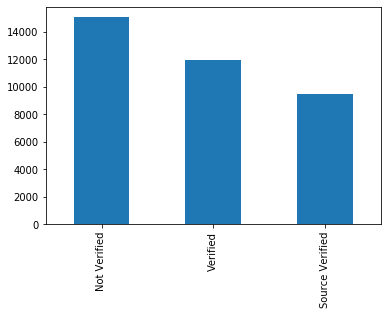

In [95]:
#loandata.info()
# Will consider the verification_status
defaultcase.sort_values('verification_status',inplace=True)
sns.barplot(x='verification_status', y='loan_status', data=defaultcase)
#plt.xticks(rotation='vertical')
plt.show()
#verified = round((loandata['verification_status'].value_counts()/loandata['verification_status'].count())*100)
verified = loandata['verification_status'].value_counts()
print(plot1)
verified.plot(kind='bar', stacked=True)
print(round((loandata['verification_status'].value_counts()/loandata['verification_status'].count())*100))
#OBSERVATION
###Verified cases defaulted more than not verified cases
##41% of the loans issues without verification 

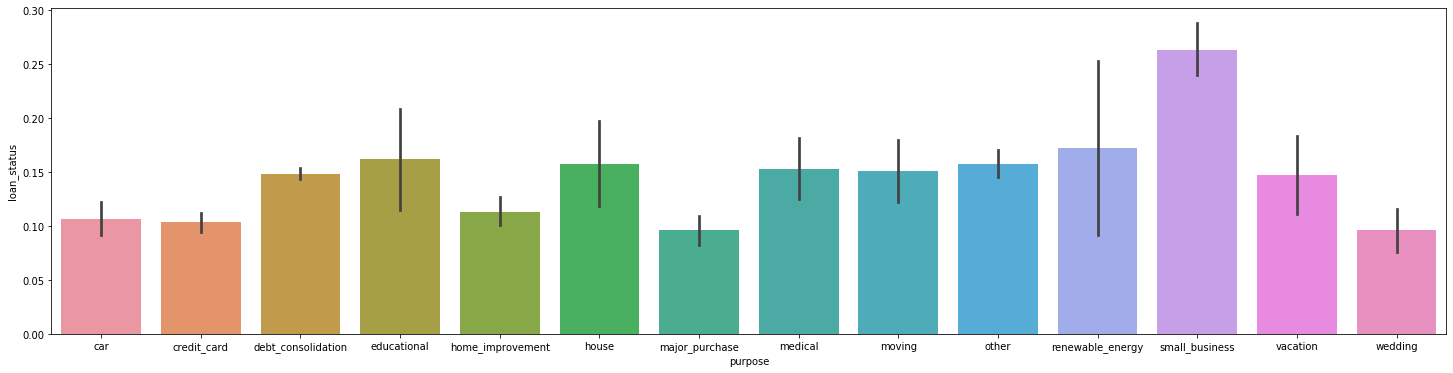

In [96]:
#loandata.info()
# Will consider the purpose
plt.figure(figsize=(25, 6))
defaultcase.sort_values('purpose',inplace=True)
sns.barplot(x='purpose', y='loan_status', data=defaultcase)
#plt.xticks(rotation='vertical')
plt.show()
#OBSERVATION
###Small business, renewable energy ,educational loans are defaulted more

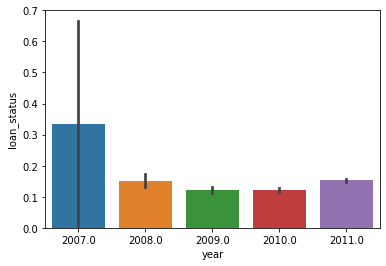

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36442 entries, 39623 to 18215
Data columns (total 49 columns):
loan_amnt                     35376 non-null float64
funded_amnt                   35376 non-null float64
funded_amnt_inv               35376 non-null float64
term                          35376 non-null float64
int_rate                      35376 non-null float64
installment                   35376 non-null float64
grade                         35376 non-null object
sub_grade                     35376 non-null object
emp_title                     35376 non-null object
emp_length                    35376 non-null float64
home_ownership                35376 non-null object
annual_inc                    35376 non-null float64
verification_status           35376 non-null object
issue_d                       35376 non-null datetime64[ns]
loan_status                   35376 non-null float64
pymnt_plan                    35376 non-null object
purpose                       35376 no

In [97]:
defaultcase.sort_values('year',inplace=True)
sns.barplot(x='year', y='loan_status', data=defaultcase)
#plt.xticks(rotation='vertical')
plt.show()

defaultcase['year'] = defaultcase['year']
defaultcase.info()
#OBSERVATION
###In 2011 default cases again increased

In [98]:
print(defaultcase.loan_amnt.describe())
## 0 to 25%  loan_amt consider as LOW
## 25 to 50%  loan_amt consider as medium
## 50 to 75%  loan_amt consider as high
## >75%  loan_amt consider as Very high

### Loan_amount field changing in categorical form 
def loan_amount(n):
    if n <= 5500:
        return 'low'
    elif n >5500 and n <= 10000:
        return 'medium'
    elif n > 10000 and n <= 15000:
        return 'high'
    else:
        return 'very high'
    
   


count    35376.000000
mean     11132.782112
std       7326.262426
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


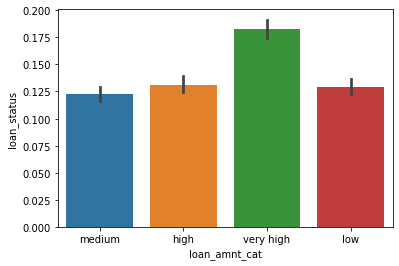

In [99]:
# apply the loanamount function 
defaultcase['loan_amnt_cat'] = defaultcase['loan_amnt'].apply(lambda x: loan_amount(x))
sns.barplot(x='loan_amnt_cat', y='loan_status', data=defaultcase)
plt.show()

###Observation 
##High range Loan amount are defaulted more
        

count    35376.000000
mean     10866.055377
std       7069.366329
min        500.000000
25%       5500.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


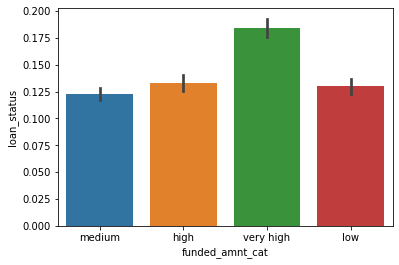

In [100]:
#funded_amnt  (The total amount committed to that loan at that point in time.)
print(defaultcase.funded_amnt.describe())
## We can use the same function for this also  there is not much difference in LOW/High values
defaultcase['funded_amnt_cat'] = defaultcase['funded_amnt'].apply(lambda x: loan_amount(x))
sns.barplot(x='funded_amnt_cat', y='loan_status', data=defaultcase)
plt.show()

###Observation 
####This is similar as Loan amount .. Funded_amt committed to that loan at that point

In [101]:
##annualIncome
print(defaultcase.annual_inc.describe())
def annual_inc(n):
    if n <= 45000:
        return 'low'
    elif n > 45000 and n <=60000:
        return 'medium'
    elif n > 60000 and n <=85000:
        return 'high'
    else:
        return 'very high'


count    3.537600e+04
mean     6.909044e+04
std      6.396044e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


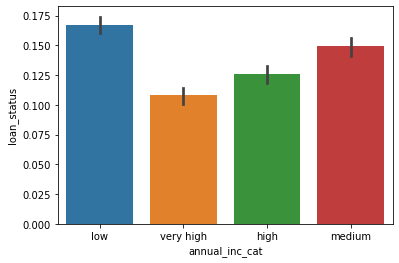

In [102]:

# apply the Annual inc function 
defaultcase['annual_inc_cat'] = defaultcase['annual_inc'].apply(lambda x: annual_inc(x))
sns.barplot(x='annual_inc_cat', y='loan_status', data=defaultcase)
plt.show()

###Observation 
##Lower the Annual income defaulted more

In [103]:
###Installment
print(defaultcase.installment.describe())
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <= 400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'


count    35376.000000
mean       324.026159
std        207.137056
min         16.080000
25%        167.840000
50%        280.620000
75%        426.530000
max       1305.190000
Name: installment, dtype: float64


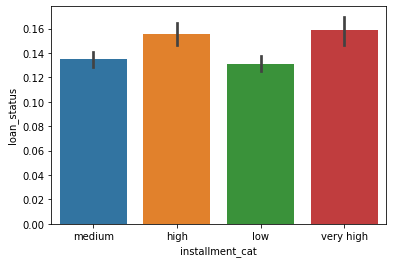

In [104]:

# apply the installment function 
defaultcase['installment_cat'] = defaultcase['installment'].apply(lambda x: installment(x))
sns.barplot(x='installment_cat', y='loan_status', data=defaultcase)
plt.show()
## OBSERVATION
##Default cases are more for Higher installment


In [105]:
###int_rate

print(defaultcase.int_rate.describe())
def int_rate(n):
    if n <= 8:
        return 'low'
    elif n > 8 and n <= 11:
        return 'medium'
    elif n > 11 and n <=14:
        return 'high'
    else:
        return 'very high'


count    35376.000000
mean        11.984024
std          3.702657
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64


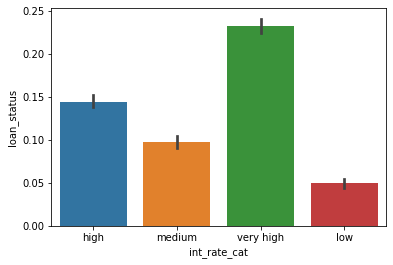

In [106]:
# apply the int_rate_cat function 
defaultcase['int_rate_cat'] = defaultcase['int_rate'].apply(lambda x: int_rate(x))
sns.barplot(x='int_rate_cat', y='loan_status', data=defaultcase)
plt.show()
## OBSERVATION
##Default cases are more for Higher int_rate

In [107]:
##### Segmented Univariate Analysis#######################################
##Group by dimensions
##Summarise using a relevant metric such as mean, median, etc.
##Compare the aggregated metric across groups/categories 

## Univariable variables which impacting the Default cases like
#1.Grade
#2.Sub_grade
#3.Term
#4.Purpose
#5.Annual_Income
#6.Installment/int_rate
#7.Loan_amount/Funded_amt
#8.verification status

## Loan requested based on the need/Purpose and loan issued based on need/Annual Income/Job


pur = defaultcase['purpose'].value_counts()
paired_colors = plt.cm.Paired(range(len(pur)))
#pur.plot(kind='bar', stacked=True,color = paired_colors)
#plot1 = round((loandata['loan_status'].value_counts()/loandata['loan_status'].count())*100)
#print(plot1)
## Consider Top 6 purpose 


purpose = ["debt_consolidation","credit_card","other","home_improvement","major_purchase","car"]
purpose_loans = defaultcase[defaultcase['purpose'].isin(purpose)]
purpose_loans['purpose'].value_counts()


debt_consolidation    16914
credit_card            4627
other                  3464
home_improvement       2614
major_purchase         1974
car                    1395
Name: purpose, dtype: int64

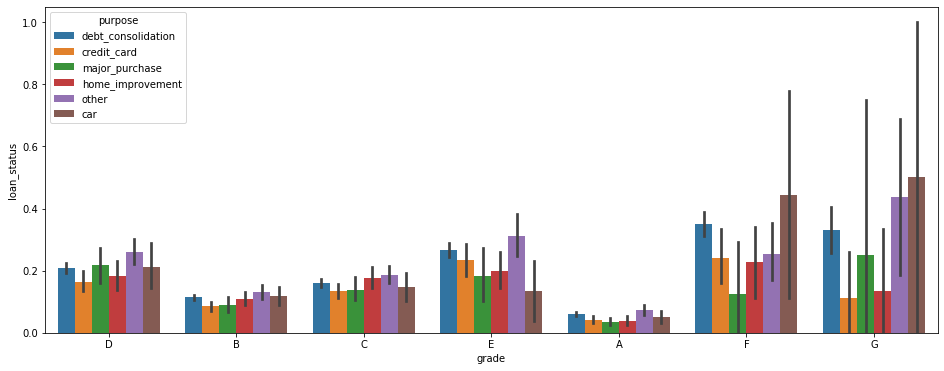

In [108]:
##### Segmented Univariate Analysis#######################################
##1.Group by dimensions
##Default cases against top 6 purposes and grade
plt.figure(figsize=[16, 6])
sns.barplot(x='grade', y='loan_status', hue='purpose', data=purpose_loans)
plt.show()
##OBSERVATION
## Car loans defaulted more in Grade F,G  and "other cases /Debt_conolidation cases ' are next higher 

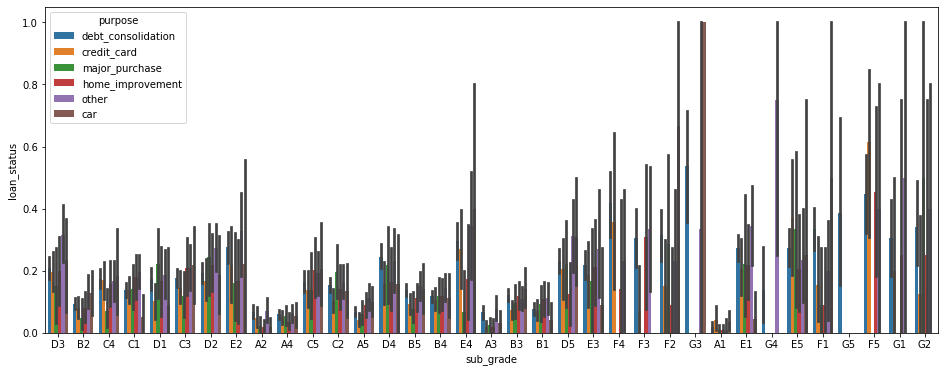

In [113]:
##2.Group by dimensions
##Default cases against top 6 purposes and subgrade
plt.figure(figsize=[16, 6])
sns.barplot(x='sub_grade', y='loan_status', hue='purpose', data=purpose_loans)
plt.show()
##OBSERVATION
## Car loans defaulted more in Grade  and "other cases /Debt_conolidation cases ' are next higher 
 

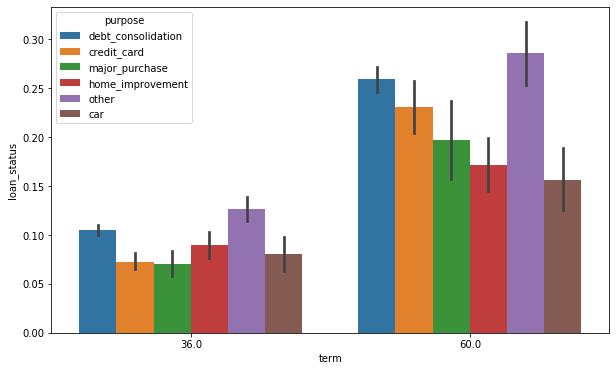

In [110]:
##3.Group by dimensions
##Default cases against top 6 purposes and term
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y='loan_status', hue='purpose', data=purpose_loans)
plt.show()
##OBSERVATION
## Other & Debt_consolidation purpose default cases higher in both terms

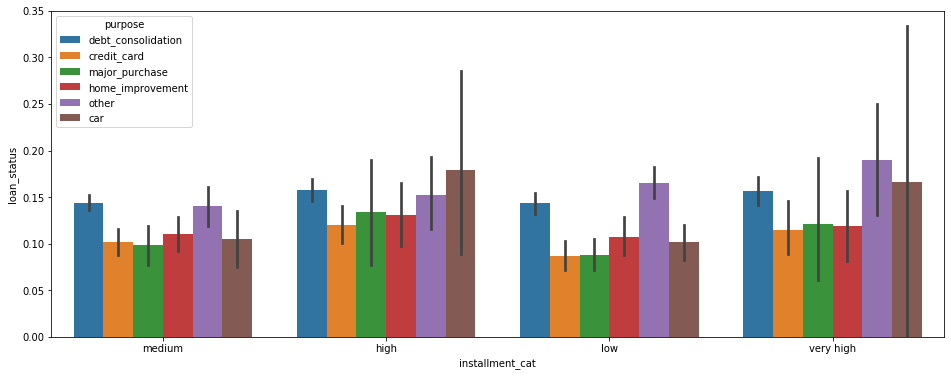

In [114]:
##4.Group by dimensions
##Default cases against top 6 purposes and installment_cat
plt.figure(figsize=[16, 6])
sns.barplot(x='installment_cat', y='loan_status', hue='purpose', data=purpose_loans)
plt.show()
##OBSERVATION
## debt_consolidation/Other/Car are more default rate purpose in high/veryhigh 


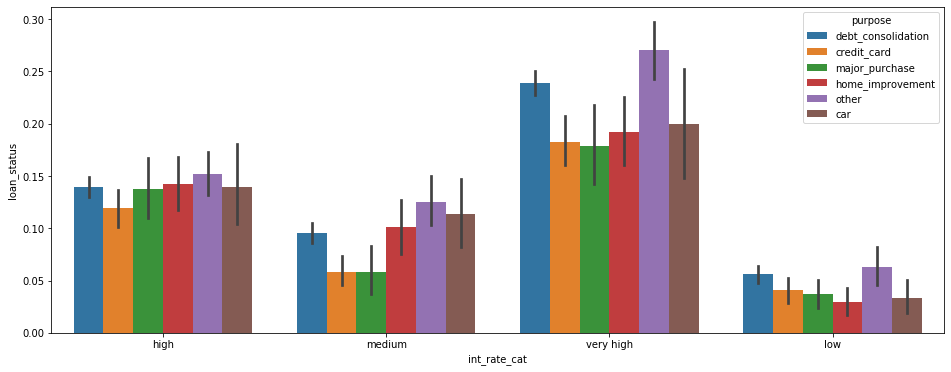

In [115]:
##5.Group by dimensions
##Default cases against top 6 purposes and int_rate
plt.figure(figsize=[16, 6])
sns.barplot(x='int_rate_cat', y='loan_status', hue='purpose', data=purpose_loans)
plt.show()
##OBSERVATION
## debt_consolidation/Other/Car are more default rate purpose in high/veryhigh 


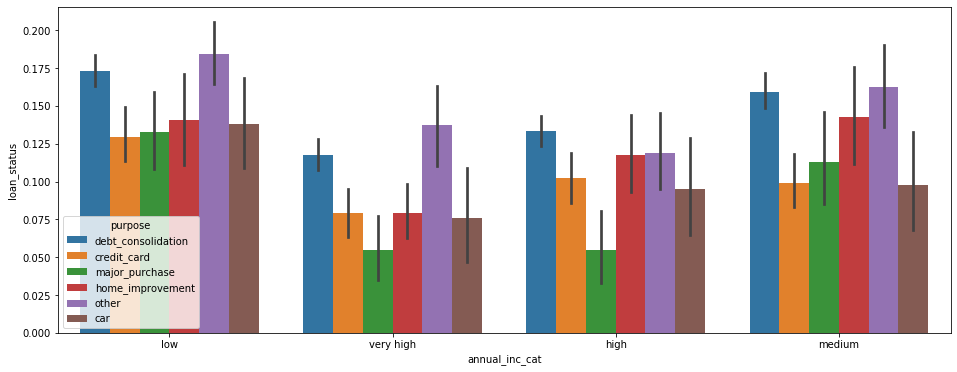

In [116]:
##6.Group by dimensions
##Default cases against top 6 purposes and annual_inc
plt.figure(figsize=[16, 6])
sns.barplot(x='annual_inc_cat', y='loan_status', hue='purpose', data=purpose_loans)
plt.show()
##OBSERVATION
## debt_consolidation/Other/home_improvement  are more default rate purpose Low & Medium income 
## Whose sal < 60000$    

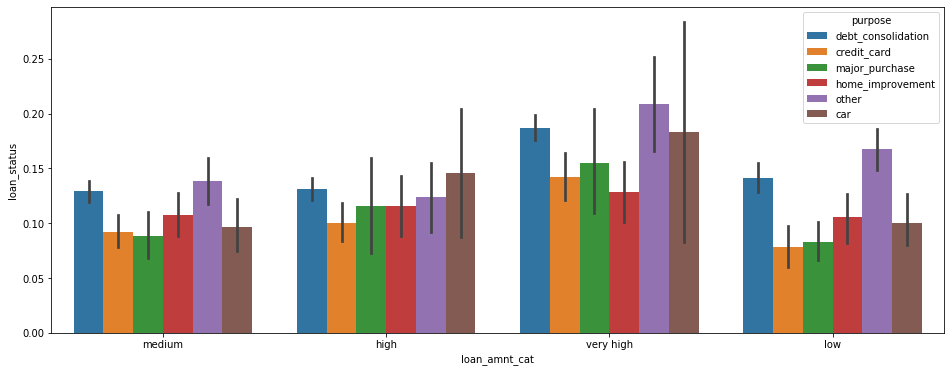

In [117]:
##7.Group by dimensions
##Default cases against top 6 purposes and loan_amt
plt.figure(figsize=[16, 6])
sns.barplot(x='loan_amnt_cat', y='loan_status', hue='purpose', data=purpose_loans)
plt.show()
##OBSERVATION
## debt_consolidation/Other/car  are more default rate where loan_amount is high &very high cases
## Whose loan_amount > 10000   

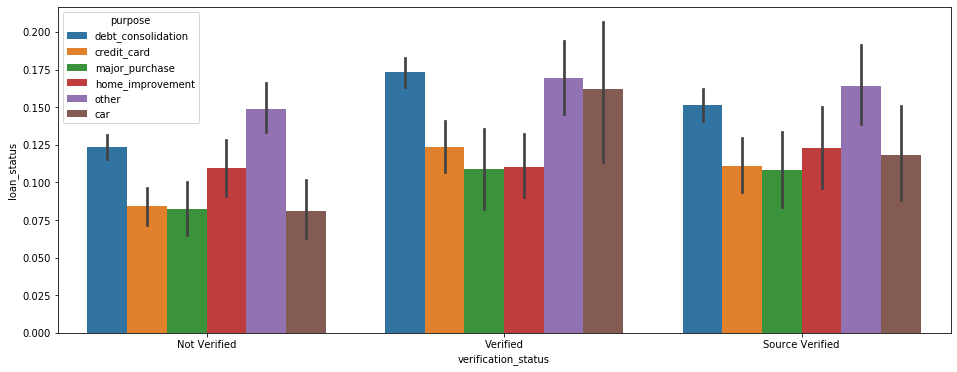

In [118]:
###8.Group by dimensions
##Default cases against top 6 purposes and verificationstatus
plt.figure(figsize=[16, 6])
sns.barplot(x='verification_status', y='loan_status', hue='purpose', data=purpose_loans)
plt.show()
##OBSERVATION
## debt_consolidation/Other/home_improvement  are more default rate not verified cases 
## debt_consolidation/Other/car  are more default rate  verified cases 

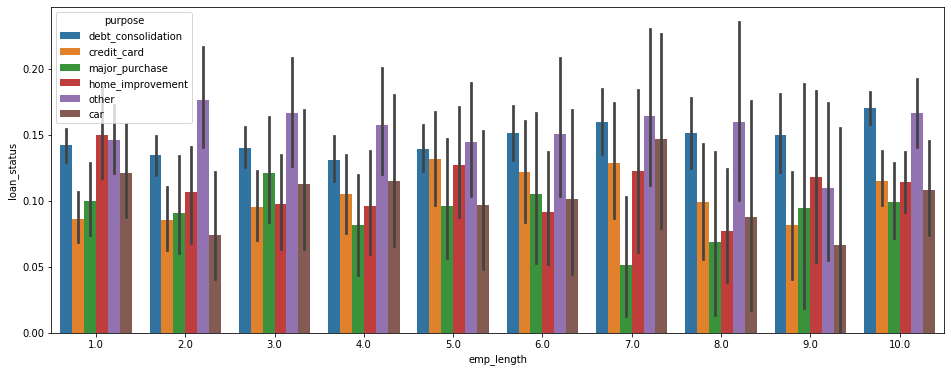

In [119]:
##9.Group by dimensions
##Default cases against top 6 purposes and verificationstatus
plt.figure(figsize=[16, 6])
sns.barplot(x='emp_length', y='loan_status', hue='purpose', data=purpose_loans)
plt.show()
##OBSERVATION
## debt_consolidation/Other/home_improvement  are more default rate not verified cases 
## debt_consolidation/Other/car  are more default rate  verified cases 

In [120]:

##### Segmented Univariate Analysis#######################################
##Summarise using a relevant metric such as mean
purpose_loans.groupby('annual_inc_cat').loan_status.mean().sort_values(ascending=False)
#OBSERVATION
#Low income sal having more default cases 
#Variation between them is 6%

annual_inc_cat
low          0.162179
medium       0.143818
high         0.119930
very high    0.102922
Name: loan_status, dtype: float64

In [121]:
##### Segmented Univariate Analysis#######################################
#2.Summarise using a relevant metric such as mean
purpose_loans.groupby('installment_cat').loan_status.mean().sort_values(ascending=False)
#OBSERVATION
#high installment has more  default cases 
#Variation between low to high is 2%

installment_cat
high         0.148671
very high    0.147770
medium       0.130119
low          0.127572
Name: loan_status, dtype: float64

In [122]:
##### Segmented Univariate Analysis#######################################
#3.Summarise using a relevant metric such as mean
purpose_loans.groupby('loan_amnt_cat').loan_status.mean().sort_values(ascending=False)
#OBSERVATION
#high loan_amount has more  default cases 
#Variation between low to high is 5%

loan_amnt_cat
very high    0.175240
low          0.126312
high         0.124060
medium       0.118160
Name: loan_status, dtype: float64

In [123]:
##### Segmented Univariate Analysis#######################################
#4.Summarise using a relevant metric such as mean
purpose_loans.groupby('purpose').loan_status.mean().sort_values(ascending=False)
#OBSERVATION
##Other and Debt consolidation o
#Variation between low to high is 5%
loandata.groupby('purpose').loan_status.mean().sort_values(ascending=False)
## On Raw data 
##Small business&House more default cases

purpose
small_business        0.340877
house                 0.227405
other                 0.215823
debt_consolidation    0.207635
renewable_energy      0.193182
medical               0.187697
home_improvement      0.176710
moving                0.172023
car                   0.169785
vacation              0.169643
educational           0.161871
credit_card           0.143643
wedding               0.141084
major_purchase        0.129418
Name: loan_status, dtype: float64

In [124]:
##### Segmented Univariate Analysis#######################################
#5.Summarise using a relevant metric such as mean
purpose_loans.groupby('grade').loan_status.mean().sort_values(ascending=False)
#OBSERVATION
##Other and Debt consolidation o
#Variation between low to high is 20%


grade
F    0.313953
G    0.299107
E    0.255002
D    0.207520
C    0.158112
B    0.109734
A    0.053801
Name: loan_status, dtype: float64

In [125]:
##### Segmented Univariate Analysis#######################################
#5.Summarise using a relevant metric such as mean
purpose_loans.groupby('sub_grade').loan_status.mean().sort_values(ascending=False)
#OBSERVATION

#Variation between low to high is 45%  (A1 to G3)

sub_grade
G3    0.472222
F5    0.465116
F4    0.358333
G2    0.316667
G1    0.287879
F1    0.283465
F3    0.280576
F2    0.280000
E4    0.279883
E5    0.272727
G5    0.263158
E2    0.260870
E1    0.257377
D5    0.231689
D4    0.222678
D3    0.216216
E3    0.211538
D2    0.203947
C3    0.175497
C5    0.167763
D1    0.165545
C4    0.165119
G4    0.162791
C1    0.146732
C2    0.146650
B5    0.128585
B4    0.119433
B3    0.111891
B2    0.094081
B1    0.081748
A5    0.071753
A4    0.055101
A3    0.048660
A2    0.048658
A1    0.020548
Name: loan_status, dtype: float64

In [126]:
##### Segmented Univariate Analysis#######################################
#6.Summarise using a relevant metric such as mean
purpose_loans.groupby('verification_status').loan_status.mean().sort_values(ascending=False)
#OBSERVATION

#Variation between verified & not verified cases is 4%

verification_status
Verified           0.156659
Source Verified    0.139750
Not Verified       0.114520
Name: loan_status, dtype: float64

In [127]:
##### Segmented Univariate Analysis#######################################
#6.Summarise using a relevant metric such as mean
purpose_loans.groupby('term').loan_status.mean().sort_values(ascending=False)
#OBSERVATION

#Term is 15%

term
60.0    0.240543
36.0    0.097955
Name: loan_status, dtype: float64

In [128]:
##### Segmented Univariate Analysis#######################################
#7.Summarise using a relevant metric such as mean
purpose_loans.groupby('emp_length').loan_status.mean().sort_values(ascending=False)
#OBSERVATION

#Variation between junior to higher leves default cases is <2%

emp_length
10.0    0.149154
7.0     0.146223
6.0     0.137031
5.0     0.132959
3.0     0.130501
1.0     0.130069
8.0     0.129721
9.0     0.125356
2.0     0.124752
4.0     0.123110
Name: loan_status, dtype: float64

In [129]:
###BIVARIATE CORRELATION MATRIX##################
defaultcase.info()
new_corr_loan = pd.DataFrame([defaultcase.loan_amnt_cat,
                              defaultcase.term,
                              defaultcase.installment_cat,
                              defaultcase.grade,
                              defaultcase.emp_length,
                              defaultcase.home_ownership,
                              defaultcase.annual_inc_cat,
                              defaultcase.purpose,
                              defaultcase.verification_status,
                              defaultcase.int_rate_cat,
                              defaultcase.sub_grade,
                              defaultcase.year
                             ]).transpose()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36442 entries, 39623 to 18215
Data columns (total 54 columns):
loan_amnt                     35376 non-null float64
funded_amnt                   35376 non-null float64
funded_amnt_inv               35376 non-null float64
term                          35376 non-null float64
int_rate                      35376 non-null float64
installment                   35376 non-null float64
grade                         35376 non-null object
sub_grade                     35376 non-null object
emp_title                     35376 non-null object
emp_length                    35376 non-null float64
home_ownership                35376 non-null object
annual_inc                    35376 non-null float64
verification_status           35376 non-null object
issue_d                       35376 non-null datetime64[ns]
loan_status                   35376 non-null float64
pymnt_plan                    35376 non-null object
purpose                       35376 no

In [130]:
Corrloan = defaultcase.drop(['delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 
                             'chargeoff_within_12_mths','acc_now_delinq','application_type'
                            ,'policy_code','collections_12_mths_ex_med','last_credit_pull_d'
                            
                            ], axis=1)
Corrloan.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 36442 entries, 39623 to 18215
Data columns (total 45 columns):
loan_amnt                  35376 non-null float64
funded_amnt                35376 non-null float64
funded_amnt_inv            35376 non-null float64
term                       35376 non-null float64
int_rate                   35376 non-null float64
installment                35376 non-null float64
grade                      35376 non-null object
sub_grade                  35376 non-null object
emp_title                  35376 non-null object
emp_length                 35376 non-null float64
home_ownership             35376 non-null object
annual_inc                 35376 non-null float64
verification_status        35376 non-null object
issue_d                    35376 non-null datetime64[ns]
loan_status                35376 non-null float64
pymnt_plan                 35376 non-null object
purpose                    35376 non-null object
dti                        35376 non-

In [131]:
Corrloan =  Corrloan.drop(['funded_amnt_inv','pymnt_plan','dti','delinq_2yrs','earliest_cr_line'
                            ,'inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util'
                           ,'total_acc','initial_list_status','out_prncp','out_prncp_inv'
                           ,'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int'
                           ,'total_rec_late_fee','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt'
                            ], axis=1)


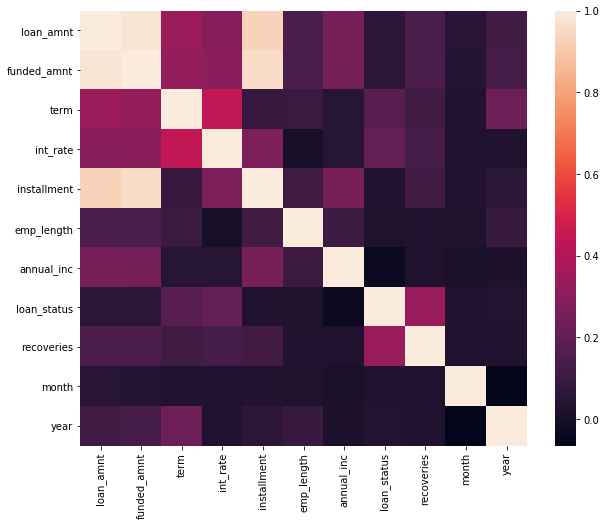

In [132]:
f, ax = plt.subplots(figsize=(10, 8))
corr = Corrloan.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)